# Clustering

# Q2

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [4]:
df=pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.rename(columns = {'Unnamed: 0':'Place'}, inplace = True)
df.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
df.shape

(50, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Place     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
df.columns

Index(['Place', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [10]:
df.isnull()

,Place,Murder,Assault,UrbanPop,Rape
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [11]:
df.isnull().sum()

Place       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

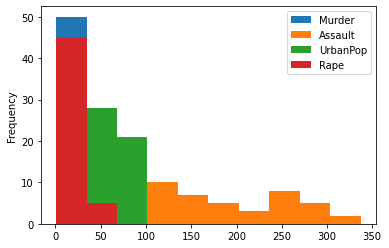

In [12]:
df.plot.hist()

# Hierarchical Clustering

In [13]:
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [14]:
df1 = MinMaxScaler()
df1=df1.fit_transform(df.iloc[:,1:])

Text(0.5, 1.0, 'Single Linkage Dendogram')

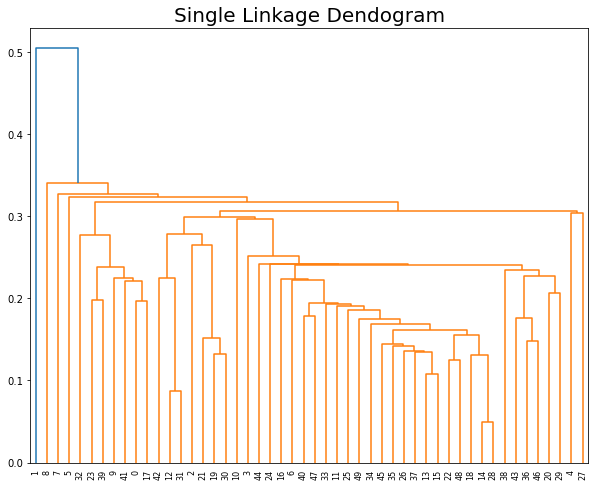

In [15]:
fig = plt.figure(figsize = (10,8))
dendogram = sch.dendrogram(sch.linkage(df1, method = 'single'))
plt.title('Single Linkage Dendogram', size = 20)

Text(0.5, 1.0, 'Ward Linkage Dendogram')

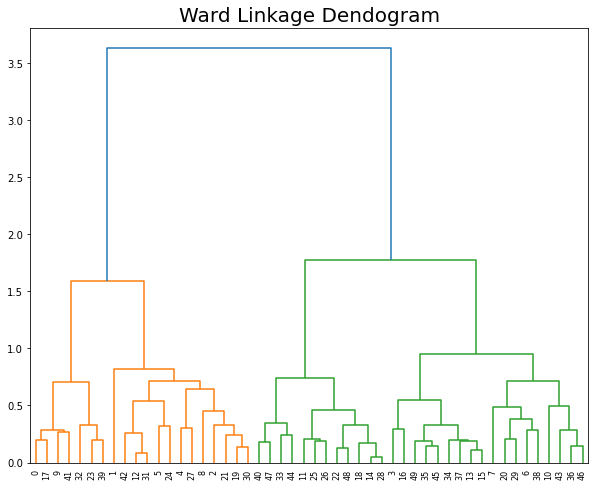

In [16]:
fig = plt.figure(figsize = (10,8))
dendrogram = sch.dendrogram(sch.linkage(df1, method='ward'))
plt.title('Ward Linkage Dendogram', size = 20)

Text(0.5, 1.0, 'Complete Linkage Dendogram')

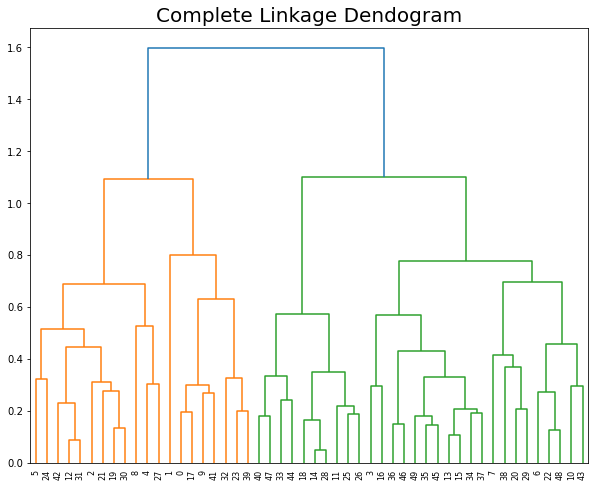

In [17]:
fig = plt.figure(figsize = (10,8))
dendrogram = sch.dendrogram(sch.linkage(df1, method='complete'))
plt.title('Complete Linkage Dendogram', size = 20)

Text(0.5, 1.0, 'Complete Linkage Dendogram')

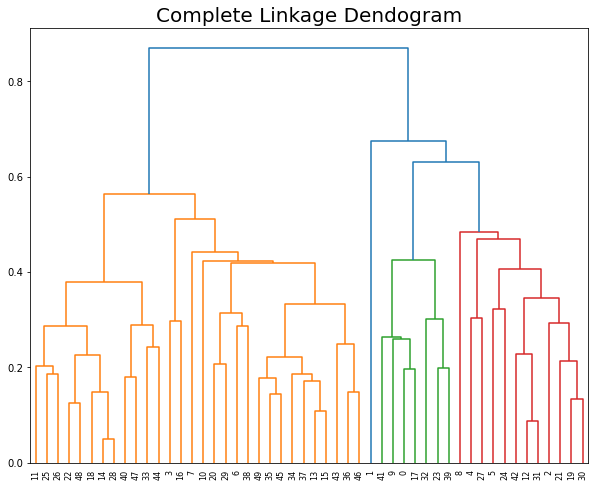

In [18]:
fig = plt.figure(figsize = (10,8))
dendrogram = sch.dendrogram(sch.linkage(df1, method='average'))
plt.title('Complete Linkage Dendogram', size = 20)

In [19]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
hc.fit_predict(df1)

array([3, 0, 0, 4, 0, 0, 1, 1, 0, 3, 1, 2, 0, 4, 2, 4, 4, 3, 2, 0, 1, 0,
       2, 3, 0, 2, 2, 0, 2, 1, 0, 0, 3, 2, 4, 4, 1, 4, 1, 3, 2, 3, 0, 1,
       2, 4, 1, 2, 2, 4], dtype=int64)

In [20]:
y_hc = hc.fit_predict(df1)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,3
1,0
2,0
3,4
4,0
5,0
6,1
7,1
8,0
9,3


# Kmeans

In [21]:
s = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 12)
    kmeans.fit(df1)
    s.append(kmeans.inertia_)

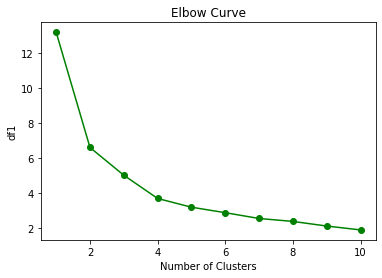

In [22]:
plt.plot(range(1,11), s, 'bo-', color = 'g')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('df1')
plt.show()

In [23]:
kmeans_cluster = KMeans(4, random_state = 42)
kmeans_cluster.fit(df1)

KMeans(n_clusters=4, random_state=42)

In [24]:
y_pred_k=kmeans_cluster.fit_predict(df1)

In [25]:
df['Cluster'] = y_pred_k
df.head()

,Place,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [26]:
df['Cluster'].value_counts()

3    17
0    13
1    12
2     8
Name: Cluster, dtype: int64

# DBSCAN

In [27]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler

In [28]:
stscaler = StandardScaler().fit(df1)
X = stscaler.transform(df1)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [29]:
dbscan = DBSCAN(eps=0.9, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.9)

In [30]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0],
      dtype=int64)

In [31]:
c=pd.DataFrame(dbscan.labels_,columns=['cluster'])
c

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [32]:
pd.concat([df,c],axis=1)

,Place,Murder,Assault,UrbanPop,Rape,Cluster,cluster
0,Alabama,13.2,236,58,21.2,2,-1
1,Alaska,10.0,263,48,44.5,1,-1
2,Arizona,8.1,294,80,31.0,1,-1
3,Arkansas,8.8,190,50,19.5,2,-1
4,California,9.0,276,91,40.6,1,-1
5,Colorado,7.9,204,78,38.7,1,-1
6,Connecticut,3.3,110,77,11.1,3,0
7,Delaware,5.9,238,72,15.8,3,-1
8,Florida,15.4,335,80,31.9,1,-1
9,Georgia,17.4,211,60,25.8,2,-1


# Conclusion

From the above table, it is evident that different types of hierarchical clustering is way more complex to understand and Average Linkage is giving better result compared to other hierarchical clustering. From all the clustering methods DBSCAN Clustering also provides the better result.